In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

file_path = 'C:/Users/a/Desktop/프로젝트/model2.csv'
data2 = pd.read_csv(file_path)

data2.head()

,"last_name, first_name",player_id,year,pa,k_percent,bb_percent,on_base_percent,b_walkoff,z_swing_percent,oz_swing_percent,oz_contact_percent,iz_contact_percent,whiff_percent,swing_percent
0,"Cabrera, Miguel",408234,2021,526,22.4,7.6,0.316,1,69.1,30.2,57.1,82.0,25.8,49.4
1,"Molina, Yadier",425877,2021,473,16.7,5.1,0.297,2,76.0,38.9,63.3,82.7,24.0,57.1
2,"Cruz Jr., Nelson",443558,2021,584,21.6,8.7,0.334,1,73.8,31.0,52.6,77.3,30.7,51.0
3,"Peralta, David",444482,2021,538,17.1,8.6,0.325,1,66.3,27.4,59.6,86.6,21.3,46.5
4,"Escobar, Alcides",444876,2021,349,16.0,4.9,0.340,1,69.2,35.5,64.1,83.5,21.6,52.1


In [2]:
# No missing data
missing_data = data2.isnull().sum()
missing_data

last_name, first_name    0
player_id                0
year                     0
pa                       0
k_percent                0
bb_percent               0
on_base_percent          0
b_walkoff                0
z_swing_percent          0
oz_swing_percent         0
oz_contact_percent       0
iz_contact_percent       0
whiff_percent            0
swing_percent            0
dtype: int64

In [3]:
# 모델1의 예측변수 OBP에 대한 선수, 연도 데이터를 따로 생성
player_data = data2[['last_name, first_name','year','on_base_percent']]
player_data.head()

,"last_name, first_name",year,on_base_percent
0,"Cabrera, Miguel",2021,0.316
1,"Molina, Yadier",2021,0.297
2,"Cruz Jr., Nelson",2021,0.334
3,"Peralta, David",2021,0.325
4,"Escobar, Alcides",2021,0.340


In [4]:
# 'b_walkoff' 변수 제외한 나머지 변수들을 모두 변수선택
columns_of_interest = ['k_percent', 'bb_percent', 'on_base_percent', 
                       'z_swing_percent', 'oz_swing_percent', 'oz_contact_percent',
                       'iz_contact_percent', 'whiff_percent', 'swing_percent']

# Subsetting the data to these columns
selected_data = data2[columns_of_interest]

# Displaying a snapshot of selected columns to confirm selection
selected_data.head()

,k_percent,bb_percent,on_base_percent,z_swing_percent,oz_swing_percent,oz_contact_percent,iz_contact_percent,whiff_percent,swing_percent
0,22.4,7.6,0.316,69.1,30.2,57.1,82.0,25.8,49.4
1,16.7,5.1,0.297,76.0,38.9,63.3,82.7,24.0,57.1
2,21.6,8.7,0.334,73.8,31.0,52.6,77.3,30.7,51.0
3,17.1,8.6,0.325,66.3,27.4,59.6,86.6,21.3,46.5
4,16.0,4.9,0.340,69.2,35.5,64.1,83.5,21.6,52.1


In [5]:
# 각 변수별 상관관계 분석
correlation_matrix = selected_data.corr()

# OBP(출루율)과 다른 변수들의 상관관계 분석 후 상관관계가 높은 순으로 정렬
obp_correlations = correlation_matrix['on_base_percent'].sort_values(ascending=False)
obp_correlations

on_base_percent       1.000000
bb_percent            0.602917
iz_contact_percent    0.177377
oz_contact_percent    0.165520
z_swing_percent      -0.154903
whiff_percent        -0.221940
k_percent            -0.282074
swing_percent        -0.371455
oz_swing_percent     -0.404955
Name: on_base_percent, dtype: float64

In [6]:
# `selected_data`는 데이터셋에서 추출되었다고 가정
# 이상치 처리 - 1st,99th 백분위수로 제한하여 처리
for column in selected_data.columns:
    lower_bound = np.percentile(selected_data[column], 1)
    upper_bound = np.percentile(selected_data[column], 99)
    selected_data[column] = np.clip(selected_data[column], lower_bound, upper_bound)

# 이상치 처리 후 요약
selected_data.describe()

C:\Users\a\AppData\Local\Temp\ipykernel_19100\3912988919.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[column] = np.clip(selected_data[column], lower_bound, upper_bound)
C:\Users\a\AppData\Local\Temp\ipykernel_19100\3912988919.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[column] = np.clip(selected_data[column], lower_bound, upper_bound)
C:\Users\a\AppData\Local\Temp\ipykernel_19100\3912988919.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

,k_percent,bb_percent,on_base_percent,z_swing_percent,oz_swing_percent,oz_contact_percent,iz_contact_percent,whiff_percent,swing_percent
count,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000
mean,21.910644,8.476565,0.321751,68.038190,28.589882,56.958383,82.487299,24.893206,47.889177
std,5.716803,2.801871,0.032644,5.519026,5.813485,9.033539,5.126269,5.924829,4.694694
min,10.017000,3.200000,0.245340,55.217000,16.600000,36.000000,69.534000,11.834000,37.617000
25%,17.725000,6.400000,0.301000,64.200000,24.500000,50.600000,79.100000,20.700000,44.600000
50%,21.600000,8.300000,0.319000,67.900000,28.450000,56.850000,82.700000,24.700000,47.800000
75%,25.800000,10.300000,0.342000,71.900000,32.300000,62.800000,86.100000,29.000000,51.000000
max,35.183000,15.900000,0.408000,81.166000,43.949000,77.381000,92.966000,38.883000,59.483000


In [7]:
# 상관관계 높은 변수끼리 출력
highly_correlated_pairs = correlation_matrix[(correlation_matrix > 0.8) & (correlation_matrix != 1)].stack()
highly_correlated_pairs

k_percent         whiff_percent       0.885503
z_swing_percent   swing_percent       0.856047
oz_swing_percent  swing_percent       0.869145
whiff_percent     k_percent           0.885503
swing_percent     z_swing_percent     0.856047
                  oz_swing_percent    0.869145
dtype: float64

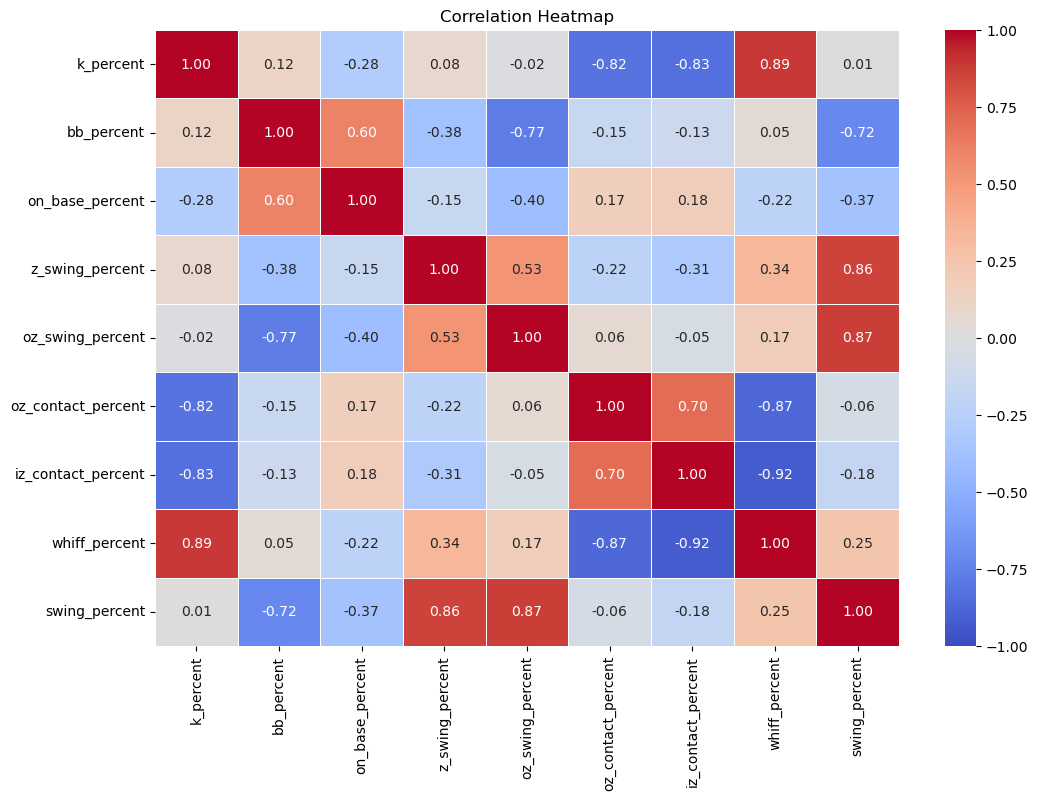

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()   

In [9]:
# 스윙률 변수 삭제 후 상관분석
selected_data = selected_data.drop(columns=['swing_percent'])
correlation_matrix = selected_data.corr()
obp_correlations = correlation_matrix['on_base_percent'].sort_values(ascending=False)
obp_correlations

on_base_percent       1.000000
bb_percent            0.590737
iz_contact_percent    0.178751
oz_contact_percent    0.169108
z_swing_percent      -0.152172
whiff_percent        -0.222827
k_percent            -0.283637
oz_swing_percent     -0.402165
Name: on_base_percent, dtype: float64

In [10]:
highly_correlated_pairs = correlation_matrix[(correlation_matrix > 0.8) & (correlation_matrix != 1)].stack()
highly_correlated_pairs

k_percent      whiff_percent    0.883436
whiff_percent  k_percent        0.883436
dtype: float64

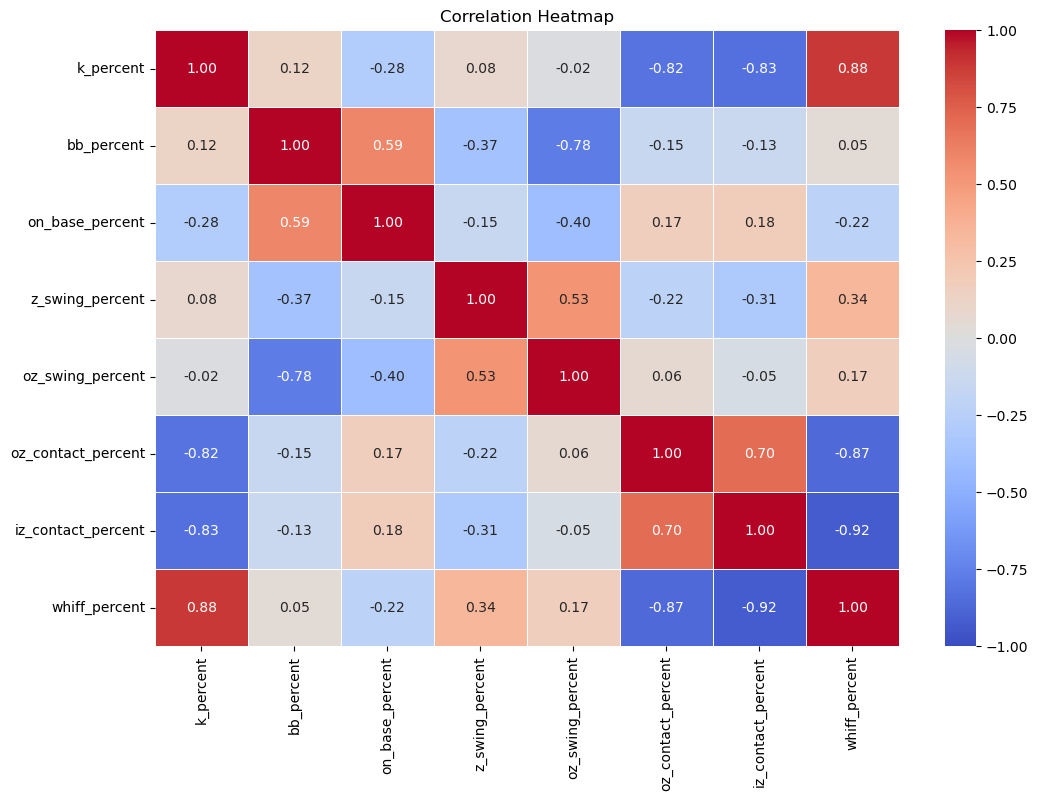

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

In [12]:
# Initialize scalers
standard_scaler = StandardScaler()

# Apply StandardScaler to proportion-based features
standard_scaler.fit_transform(selected_data)

array([[ 0.0856379 , -0.31299002, -0.1762398 , ...,  0.01568384,
        -0.09510169,  0.15311835],
       [-0.91186912, -1.20565032, -0.75854488, ...,  0.70232221,
         0.04151098, -0.15082383],
       [-0.05436308,  0.07978052,  0.37541764, ..., -0.48268273,
        -1.0123582 ,  0.98051651],
       ...,
       [-0.40436555, -0.95570543, -0.1762398 , ...,  0.23718009,
         0.45134899, -1.13019308],
       [-0.85936875, -1.27706314,  0.13023655, ...,  0.80199552,
         0.64650995, -0.74182252],
       [-1.66437441, -0.74146696,  0.83513217, ...,  1.37788577,
         1.71989522, -1.73807744]])

C:\Users\a\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\a\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Cross-validation Accuracy Scores: [0.75446429 0.75446429 0.71428571 0.76681614 0.73542601]
Mean Accuracy: 0.7450912876361306
Accuracy: 0.7008928571428571

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.71      0.70       110
           1       0.71      0.69      0.70       114

    accuracy                           0.70       224
   macro avg       0.70      0.70      0.70       224
weighted avg       0.70      0.70      0.70       224



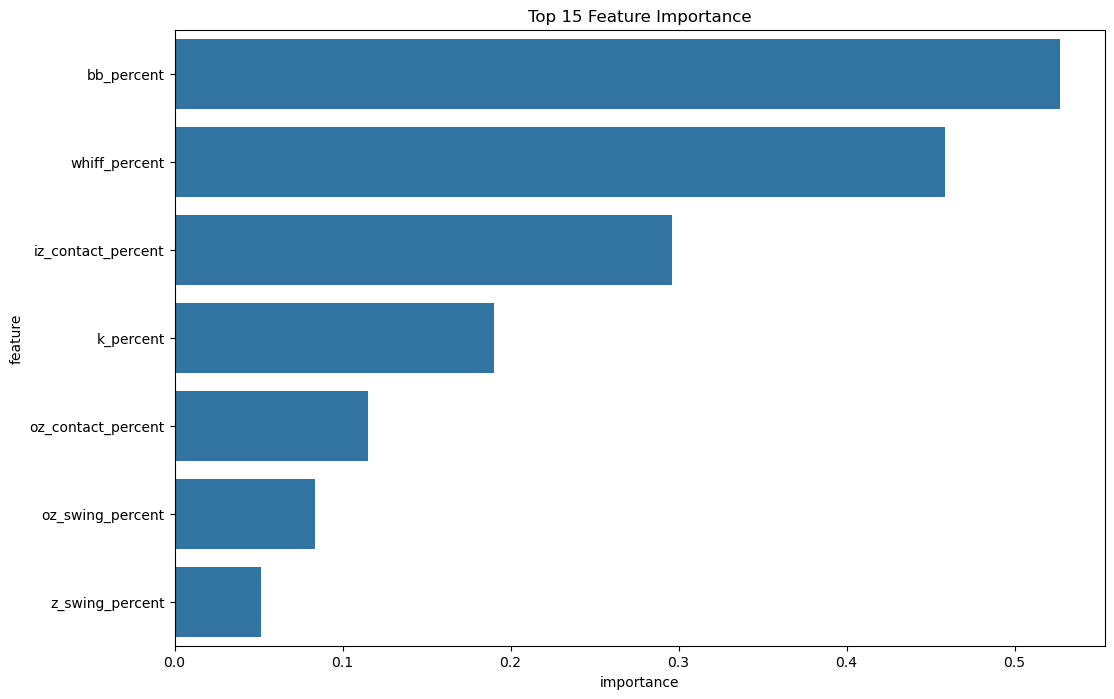

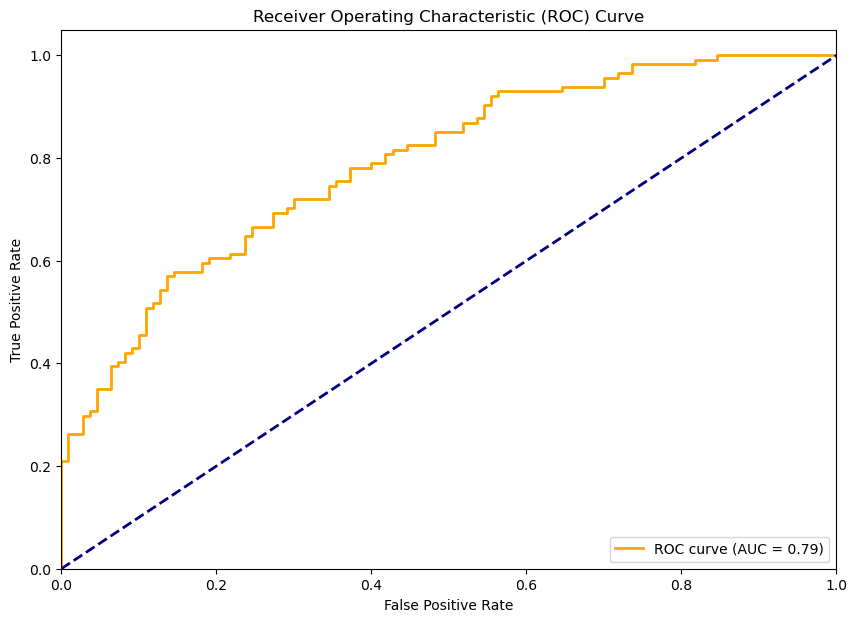

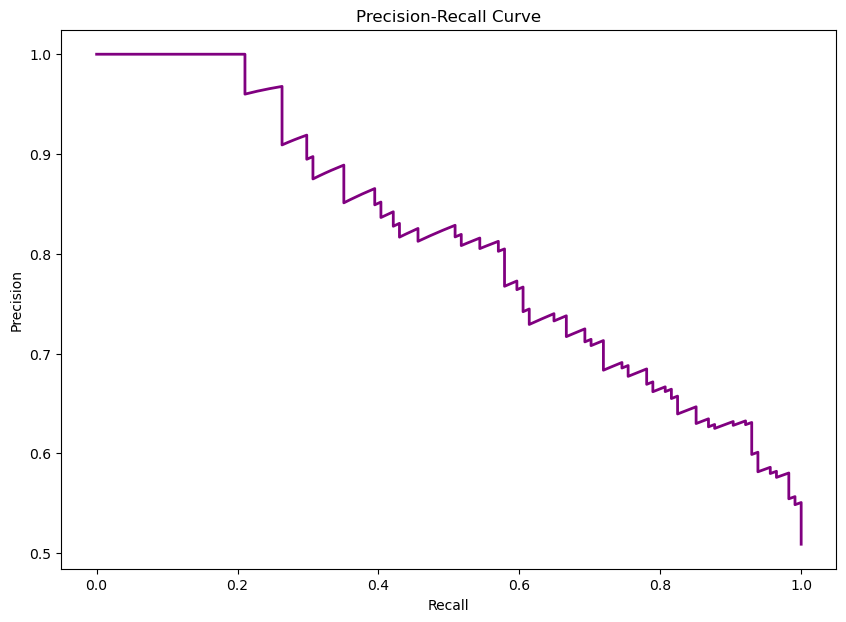

In [13]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve 

# 'on_base_percent'를 기준으로 이진 분류 타겟 생성 (중앙값 기준)
base_median = selected_data['on_base_percent'].median()
selected_data['high_base'] = (selected_data['on_base_percent'] > base_median).astype(int)

# 특성과 타겟 분리
X = selected_data.drop(['on_base_percent', 'high_base'], axis=1)
y = selected_data['high_base']

# 스케일러 학습
scaler = StandardScaler().fit(X)

# 훈련 세트와 테스트 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 생성 (L2 정규화)
model = LogisticRegression(penalty='l2', C=1.0, random_state=42)
model.fit(X_train, y_train)

# 교차 검증을 통한 성능 평가
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f'Cross-validation Accuracy Scores: {cv_scores}')
print(f'Mean Accuracy: {cv_scores.mean()}')

# 예측
y_pred = model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# 특성 중요도 시각화
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': abs(model.coef_[0])})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
plt.title('Top 15 Feature Importance')
plt.show()

# ROC 곡선
from sklearn.metrics import roc_curve, auc

y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,7))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 7))
plt.plot(recall, precision, color='purple', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [14]:
# Calculate the proportion of each feature's importance relative to the total importance
feature_importance['importance_ratio'] = feature_importance['importance'] / feature_importance['importance'].sum()

# Display the updated feature importance with ratios in percentage format
feature_importance['importance_ratio'] = feature_importance['importance_ratio'] * 100  # Convert to percentage

print(feature_importance.head(10))

              feature  importance  importance_ratio
1          bb_percent    0.527154         30.610319
6       whiff_percent    0.458552         26.626806
5  iz_contact_percent    0.296293         17.204913
0           k_percent    0.189927         11.028528
4  oz_contact_percent    0.115255          6.692526
3    oz_swing_percent    0.083408          4.843296
2     z_swing_percent    0.051554          2.993614


In [15]:
# 랜덤 시드 고정
np.random.seed(42)

# 시뮬레이션 함수 정의
def simulate_2025_data(data, num_samples=1118):
    simulated_data = data.select_dtypes(include=[np.number]).copy()
    simulated_result = pd.DataFrame()
    for column in simulated_data.columns:
        mean = simulated_data[column].mean()
        std = simulated_data[column].std()
        simulated_result[column] = np.random.normal(loc=mean, scale=std, size=num_samples)
    simulated_result.reset_index(drop=True, inplace=True)
    return simulated_result
    
# 시뮬레이션 반복 설정
simulations = 100  # 반복 횟수 설정
top_10_counts = {}  # 상위 10명 등장 빈도 저장 딕셔너리

for _ in range(simulations):
    # 2025년 데이터 시뮬레이션
    simulated_2025_data = simulate_2025_data(selected_data)
    
    # 스케일링
    X_2025 = simulated_2025_data[X.columns]
    X_2025_scaled = scaler.transform(X_2025)
    
    # 모델 예측
    simulated_2025_data['on_base_percent_prob'] = model.predict_proba(X_2025_scaled)[:, 1]
    
    # 상위 10명 추출
    top_10 = simulated_2025_data.nlargest(10, 'on_base_percent_prob').index
    
    # 상위 10명 등장 빈도 계산
    for player in top_10:
        top_10_counts[player] = top_10_counts.get(player, 0) + 1

# 등장 빈도 정렬
top_10_consistent = sorted(top_10_counts.items(), key=lambda x: x[1], reverse=True)[:10]

# 능력치 요소와 함께 출력
print("Top 10 Players Consistently Predicted Across Simulations with Attributes:")

# 능력치 데이터프레임 생성
top_10_player_ids = [player[0] for player in top_10_consistent]
top_10_attributes = simulated_2025_data.loc[top_10_player_ids]

# 등장 빈도를 추가
top_10_attributes['Frequency'] = [player[1] for player in top_10_consistent]

# 출력
print(top_10_attributes)

# 필요하면 상위 10명을 데이터프레임으로 정렬된 형태로 확인
top_10_attributes_sorted = top_10_attributes.sort_values(by='Frequency', ascending=False)
print("\nTop 10 Players Sorted by Frequency:")
print(top_10_attributes_sorted)

C:\Users\a\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\a\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\a\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\a\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\a\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\a\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid featu

Top 10 Players Consistently Predicted Across Simulations with Attributes:
      k_percent  bb_percent  on_base_percent  z_swing_percent  \
1088  14.538180    4.947787         0.271441        63.930715   
786   12.560916    6.819494         0.332210        61.894530   
500   26.779452    7.935618         0.330245        76.935985   
909   26.616995    7.281474         0.359696        62.928908   
922   16.497877   11.133847         0.293973        65.970058   
217   29.221250    8.085726         0.313990        60.986321   
59    24.510971    8.621386         0.367430        79.460467   
133   19.913379   11.123927         0.325253        64.720882   
22    23.797826    9.354413         0.319613        66.197473   
450   18.775712   10.550865         0.334037        70.172776   

      oz_swing_percent  oz_contact_percent  iz_contact_percent  whiff_percent  \
1088         29.916888           57.632356           82.307029      27.292399   
786          22.322898           43.438767      

C:\Users\a\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\a\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\a\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\a\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\a\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\a\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid featu

In [16]:
# 결과를 데이터프레임으로 변환
top_10_df = pd.DataFrame(top_10_consistent, columns=['row_n', 'Frequency'])

# 'row_n' 열이 없는 경우 인덱스를 기반으로 생성
if 'row_n' not in player_data.columns:
    player_data['row_n'] = player_data.index

# row_n을 기반으로 선수 이름('last_name, first_name') 매핑
top_10_df['Player Name'] = top_10_df['row_n'].astype(int).apply(lambda x: player_data.loc[x, 'last_name, first_name'])
top_10_df = top_10_df.drop(columns=['row_n'], errors='ignore')

# 상위 10명 선수 빈도 수 정렬
top_10_df = top_10_df.sort_values(by='Frequency', ascending=False)

C:\Users\a\AppData\Local\Temp\ipykernel_19100\533424078.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data['row_n'] = player_data.index


C:\Users\a\AppData\Local\Temp\ipykernel_19100\586888283.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_df, x='Player Name', y='Frequency', palette='coolwarm')


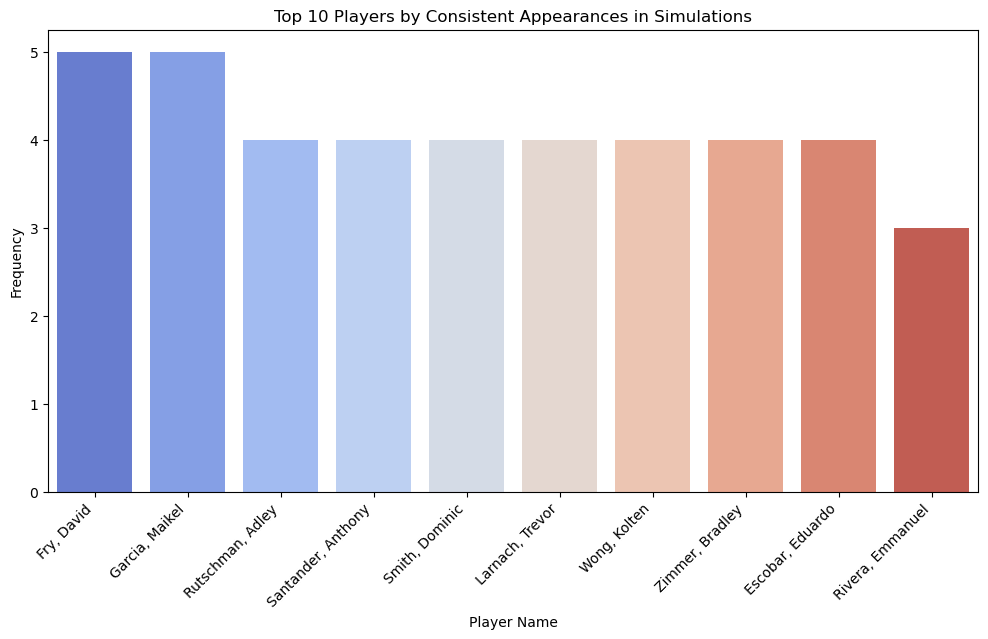

Top 10 Players with Consistent Appearances:
   Frequency         Player Name
0          5          Fry, David
1          5      Garcia, Maikel
2          4    Rutschman, Adley
3          4  Santander, Anthony
4          4      Smith, Dominic
5          4     Larnach, Trevor
6          4        Wong, Kolten
7          4     Zimmer, Bradley
8          4    Escobar, Eduardo
9          3    Rivera, Emmanuel


In [17]:
# 막대 그래프 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_df, x='Player Name', y='Frequency', palette='coolwarm')
plt.title('Top 10 Players by Consistent Appearances in Simulations')
plt.xlabel('Player Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

# 결과 출력
print("Top 10 Players with Consistent Appearances:")
print(top_10_df)

In [18]:
# 연도별 데이터 분리
data_by_year = {year: player_data[player_data['year'] == year] for year in range(2021, 2025)}

# 각 연도 데이터의 크기 확인
for year, data in data_by_year.items():
    print(f"Year {year}: {data.shape[0]} players")

Year 2021: 262 players
Year 2022: 277 players
Year 2023: 293 players
Year 2024: 286 players


In [19]:
# 선수별 평균 OBP 데이터 생성 (2021~2024년)
player_performance = player_data.groupby(['last_name, first_name', 'year'])['on_base_percent'].mean().unstack()

# OBP 2년 연속 하락 확인 함수
def has_two_years_decreasing_trend(obp_trend):
    return any(obp_trend[i] > obp_trend[i+1] > obp_trend[i+2] for i in range(len(obp_trend) - 2))

# Top 10 선수 필터링
filtered_top_10 = []

for _, row in top_10_df.iterrows():
    player_name = row['Player Name']  # 선수 이름
    if player_name in player_performance.index:  # 성과 데이터에 선수 이름이 있는지 확인
        # 선수의 연도별 obp 데이터 추출
        obp_trend = player_performance.loc[player_name]
        
        # 2023년, 2024년에 모두 데이터가 없는 선수 제외
        if pd.isna(obp_trend.get(2023)) and pd.isna(obp_trend.get(2024)):
            continue
        
        # 2년 연속 하락하는 선수 제외
        obp_trend_values = obp_trend.dropna().values  # 결측치 제거
        if has_two_years_decreasing_trend(obp_trend_values):
            continue
        
        # 조건을 만족하는 선수 추가
        filtered_top_10.append(player_name)

# 결과 출력
print("Filtered Top 10 Players After Excluding Those with Decreasing Trends or Missing Data:")
print(filtered_top_10)

Filtered Top 10 Players After Excluding Those with Decreasing Trends or Missing Data:
['Fry, David', 'Garcia, Maikel', 'Rutschman, Adley', 'Santander, Anthony', 'Smith, Dominic', 'Larnach, Trevor', 'Rivera, Emmanuel']


C:\Users\a\AppData\Local\Temp\ipykernel_19100\2879750745.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_df, x='Player Name', y='Frequency', palette='coolwarm')


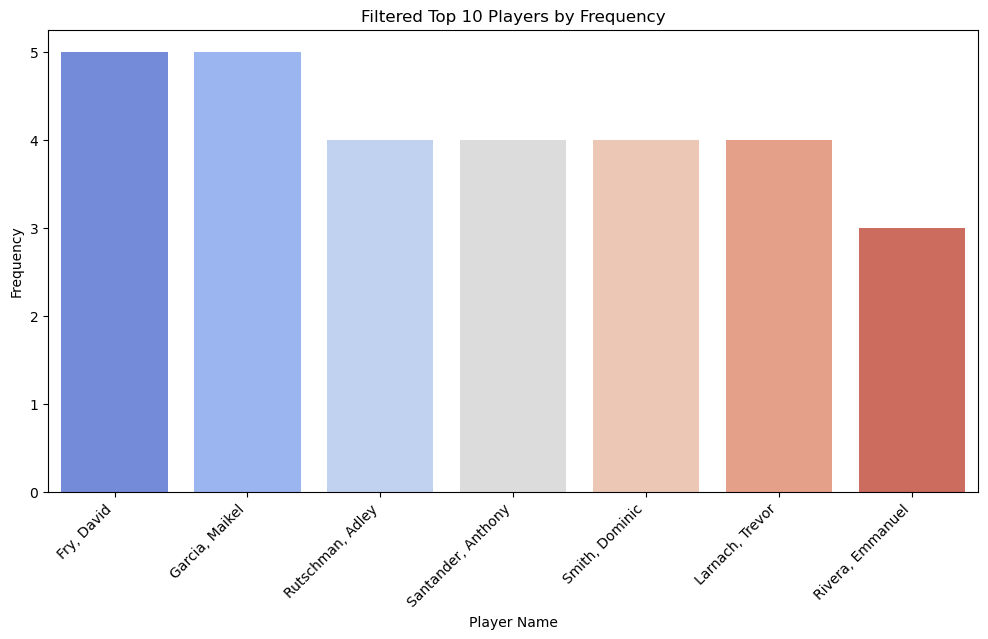

In [20]:
# Filter top_10_df to include only the filtered players
filtered_df = top_10_df[top_10_df['Player Name'].isin(filtered_top_10)].copy()

# Sort by Frequency for better visualization
filtered_df = filtered_df.sort_values(by='Frequency', ascending=False)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_df, x='Player Name', y='Frequency', palette='coolwarm')
plt.title('Filtered Top 10 Players by Frequency')
plt.xlabel('Player Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()